In [171]:
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import tensorflow as tf
import numpy as np

### Wczytanie już poprawnie przetworzonych danych

In [135]:
train_df = pd.read_json(path_or_buf='../../data/processed/train_set.jsonl')
test_df = pd.read_json(path_or_buf='../../data/processed/test_set.jsonl')

In [136]:
train_df.head()

,session_id,offered_discount,price,Akcesoria telefoniczne,Anteny RTV,Audio,Biurowe urządzenia wielofunkcyjne,Drukarki i skanery,Gry PlayStation3,Gry Xbox 360,...,Zestawy słuchawkowe,Female,Male,session_length,n_views,month,day,hour,dayofweek,purchased
0,8570,0,117.94,0,0,0,0,0,0,0,...,0,0,1,150,1,4,18,21,5,1
1,3139,0,2614.56,0,0,0,0,0,0,0,...,0,1,0,179,2,4,5,5,6,1
2,7477,0,495.00,0,0,0,0,0,0,0,...,0,0,1,264,2,1,10,3,4,1
3,5109,0,169.80,0,0,0,0,0,2,0,...,0,0,1,134,2,5,2,4,5,0
4,4917,20,157.80,0,0,0,0,0,0,0,...,0,0,1,243,1,10,4,21,0,1


### Oddzielenie zmiennej celu od pozostałych atrybutów

In [137]:
y_train = train_df['purchased'].values
X_train = train_df.drop(columns=['session_id', 'purchased']).values
y_test = test_df['purchased'].values
X_test = test_df.drop(columns=['session_id', 'purchased']).values

In [138]:
X_train

array([[0.00000e+00, 1.17940e+02, 0.00000e+00, ..., 1.80000e+01,
        2.10000e+01, 5.00000e+00],
       [0.00000e+00, 2.61456e+03, 0.00000e+00, ..., 5.00000e+00,
        5.00000e+00, 6.00000e+00],
       [0.00000e+00, 4.95000e+02, 0.00000e+00, ..., 1.00000e+01,
        3.00000e+00, 4.00000e+00],
       ...,
       [0.00000e+00, 3.86000e+02, 0.00000e+00, ..., 2.20000e+01,
        2.00000e+00, 5.00000e+00],
       [0.00000e+00, 4.63404e+03, 0.00000e+00, ..., 2.00000e+01,
        1.20000e+01, 1.00000e+00],
       [0.00000e+00, 1.43700e+02, 0.00000e+00, ..., 7.00000e+00,
        2.10000e+01, 5.00000e+00]])

In [139]:
y_train

array([1, 1, 1, ..., 1, 1, 0])

### Podział zbioru danych na zbiór treningowy i testowy

## Analiza modeli

### Las losowy

In [154]:
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [155]:
rand_forest_reg_scores = cross_val_score(random_forest_reg, X_test, y_test, cv=10)
rand_forest_reg_scores.mean()

0.965712568682948

In [156]:
predictions_train_random_forest_reg = random_forest_reg.predict(np.array(X_train,dtype=np.float64)) > 0.5
predictions_test_random_forest_reg = random_forest_reg.predict(np.array(X_test,dtype=np.float64)) > 0.5

In [162]:
cm_train_random_forest_reg = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train_random_forest_reg))
cm_test_random_forest_reg = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_test_random_forest_reg))

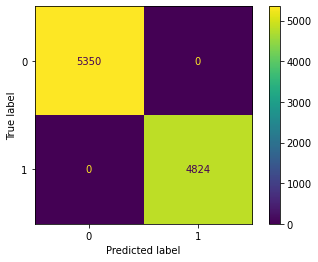

In [163]:
cm_train_random_forest_reg.plot()

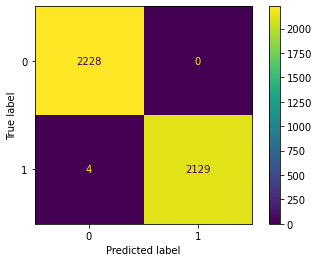

In [164]:
cm_test_random_forest_reg.plot()

### KNN

In [175]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [176]:
knn_forest_scores = cross_val_score(knn, X_test, y_test, cv=10)
knn_forest_scores.mean()

0.43646502046715935

In [177]:
predictions_train_knn = knn.predict(np.array(X_train,dtype=np.float64)) > 0.5
predictions_test_knn = knn.predict(np.array(X_test,dtype=np.float64)) > 0.5

In [178]:
cm_train_knn = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train_knn))
cm_test_knn = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_test_knn))

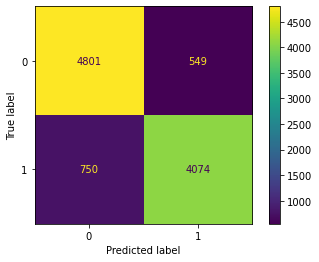

In [179]:
cm_train_knn.plot()

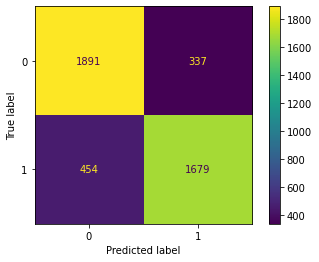

In [180]:
cm_test_knn.plot()

### Gradient Boosting

In [181]:
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)

GradientBoostingRegressor()

In [183]:
gradient_boosting_scores = cross_val_score(gradient_boosting, X_test, y_test, cv=3)
gradient_boosting_scores.mean()

0.7462468693076946

In [184]:
predictions_train_gb = gradient_boosting.predict(np.array(X_train,dtype=np.float64)) > 0.5
predictions_test_gb = gradient_boosting.predict(np.array(X_test,dtype=np.float64)) > 0.5

In [186]:
cm_train_gb = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train_gb))
cm_test_gb = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_test_gb))

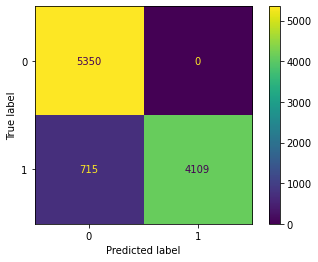

In [187]:
cm_train_gb.plot()

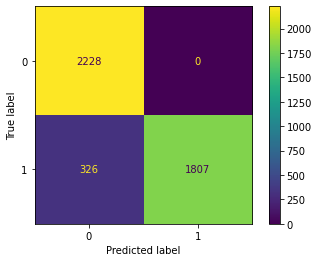

In [188]:
cm_test_gb.plot()

### Sieć neuronowa

In [123]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=len(train_df.columns)-2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

In [124]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               4992      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 15,361
Trainable params: 15,361
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [126]:
model.fit(np.array(X_train, dtype=np.float64), np.array(y_train,dtype=np.float64), epochs=200)

Epoch 1/200
318/318 [==============================] - 0s 640us/step - loss: 5.6726 - accuracy: 0.5956
Epoch 2/200
318/318 [==============================] - 0s 610us/step - loss: 3.3968 - accuracy: 0.6333
Epoch 3/200
318/318 [==============================] - 0s 595us/step - loss: 1.8864 - accuracy: 0.6576
Epoch 4/200
318/318 [==============================] - 0s 574us/step - loss: 1.9149 - accuracy: 0.6570
Epoch 5/200
318/318 [==============================] - 0s 615us/step - loss: 1.0547 - accuracy: 0.6899
Epoch 6/200
318/318 [==============================] - 0s 650us/step - loss: 1.0613 - accuracy: 0.7021
Epoch 7/200
318/318 [==============================] - 0s 621us/step - loss: 0.8272 - accuracy: 0.6978
Epoch 8/200
318/318 [==============================] - 0s 586us/step - loss: 0.6603 - accuracy: 0.7185
Epoch 9/200
318/318 [==============================] - 0s 591us/step - loss: 0.7079 - accuracy: 0.7080
Epoch 10/200
318/318 [==============================] - 0s 577us/step - l

In [189]:
predictions_train_nn = model.predict(np.array(X_train,dtype=np.float64)) > 0.5

In [190]:
predictions_test_nn = model.predict(np.array(X_test,dtype=np.float64)) > 0.5

In [191]:
cm_test_nn = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_test_nn))
cm_train_nn = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train_nn))

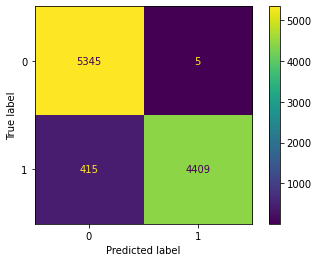

In [192]:
cm_train_nn.plot()

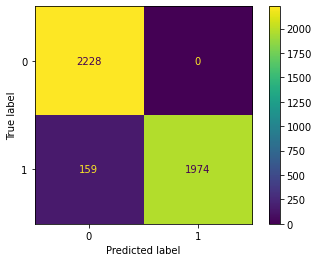

In [193]:
cm_test_nn.plot()

## Wnioski:
Wybraliśmy las losowy ze względu na bardzo szybki trening i bardzo dobre wyniki oraz sieć neuronową.